In [9]:
#imports

import os
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from tensorflow.keras import layers, models, callbacks
from tensorflow.keras.callbacks import Callback


In [10]:
#Loading the dataset
mnist = keras.datasets.mnist
(x_full, y_full), (x_test_full, y_test_full) = mnist.load_data()

In [11]:
digit_images = {}
for digit in range(10):
    image = x_full[y_full == digit][0]  
    digit_images[digit] = image

for digit, img in digit_images.items():
    print(f"Digit: {digit}, Image Shape: {img.shape}")



Digit: 0, Image Shape: (28, 28)
Digit: 1, Image Shape: (28, 28)
Digit: 2, Image Shape: (28, 28)
Digit: 3, Image Shape: (28, 28)
Digit: 4, Image Shape: (28, 28)
Digit: 5, Image Shape: (28, 28)
Digit: 6, Image Shape: (28, 28)
Digit: 7, Image Shape: (28, 28)
Digit: 8, Image Shape: (28, 28)
Digit: 9, Image Shape: (28, 28)


In [12]:
def save_convolved_images(kernel, images):
    kernel_tensor = tf.convert_to_tensor(kernel, dtype=tf.float32)  # Convert kernel to tensor
    kernel_tensor = tf.reshape(kernel_tensor, [3, 3, 1, 1])  # Reshape to match Conv2D expectations

    print(f"Using kernel shape for convolution: {kernel_tensor.shape}")
    
    # Loop over each image
    for digit, image in images.items():
        # Prepare image for convolution (expand dimensions for batch size and channel)
        image_tensor = tf.expand_dims(tf.expand_dims(image, axis=0), axis=-1)
        
        # Apply convolution using tf.nn.conv2d
        convolved_output = tf.nn.conv2d(
            input=image_tensor,
            filters=kernel_tensor,
            strides=1,
            padding='VALID'
        )

        # Create a new figure for each image with 3 subplots
        fig, axs = plt.subplots(1, 3, figsize=(12, 4))

        # Plot original image
        axs[0].imshow(image, cmap='gray')
        axs[0].set_title(f'Original Image [{digit}]')
        axs[0].axis('off')

        # Plot heatmap of the kernel
        sns.heatmap(kernel[:, :, 0, 0], ax=axs[1], cmap='coolwarm', annot=True)
        axs[1].set_title('Kernel Heatmap')
        axs[1].axis('off')

        # Plot convolved image
        axs[2].imshow(np.squeeze(convolved_output.numpy()), cmap='gray')
        axs[2].set_title(f'Convolved Image [{digit}]')
        axs[2].axis('off')

        # Save the figure
        plt.savefig(os.path.join(output_dir, f'image_{digit}_conv.png'))
        plt.close()

Kernel shape: (3, 3, 1, 1)


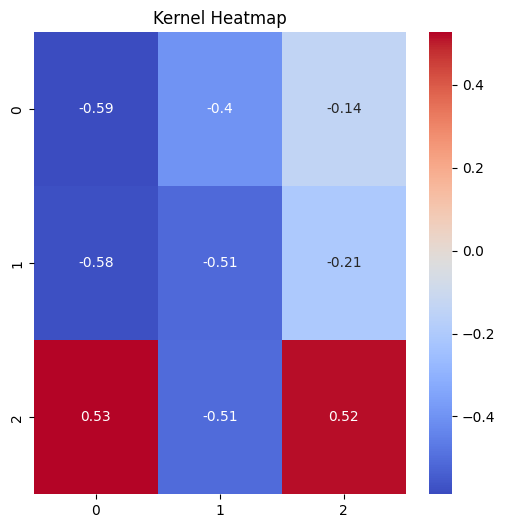

Using kernel shape for convolution: (3, 3, 1, 1)
Images saved to ./convolved_images


In [13]:
file_path = "ZeroModelWeightsTraining/AfterEpoch10/Layer_0.npz"
output_dir = "./convolved_images"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

loaded = np.load(file_path)
kernel = loaded['arr_0']
print(f"Kernel shape: {kernel.shape}")

kernel_to_plot = kernel[:, :, 0, 0]  
plt.figure(figsize=(6, 6))
sns.heatmap(kernel_to_plot, annot=True, cmap='coolwarm', cbar=True)
plt.title("Kernel Heatmap")
plt.show()

digit_images_normalized = {digit: img.astype('float32') / 255.0 for digit, img in digit_images.items()}
save_convolved_images(kernel, digit_images_normalized)
print(f"Images saved to {output_dir}")

Kernel shape: (3, 3, 1, 1)


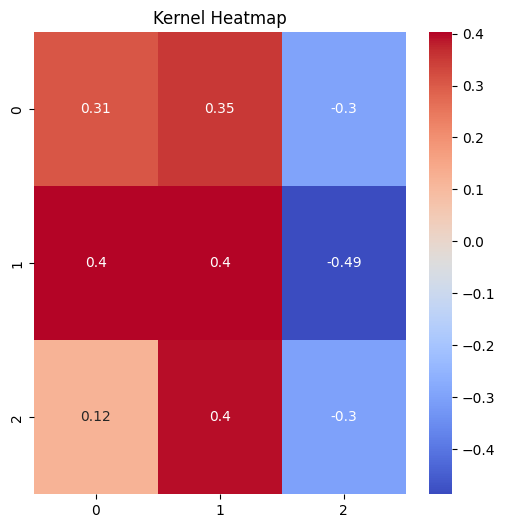

Using kernel shape for convolution: (3, 3, 1, 1)
Images saved to ./convolved_images_random1


In [14]:
file_path = "../../generateModelWeights_week4/InitWeightsConv1/layer_number_0.npz"
output_dir = "./convolved_images_random1"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

loaded = np.load(file_path)
kernel = loaded['arr_0']
print(f"Kernel shape: {kernel.shape}")

kernel_to_plot = kernel[:, :, 0, 0]  
plt.figure(figsize=(6, 6))
sns.heatmap(kernel_to_plot, annot=True, cmap='coolwarm', cbar=True)
plt.title("Kernel Heatmap")
plt.show()

digit_images_normalized = {digit: img.astype('float32') / 255.0 for digit, img in digit_images.items()}
save_convolved_images(kernel, digit_images_normalized)
print(f"Images saved to {output_dir}")

Kernel shape: (3, 3, 1, 1)


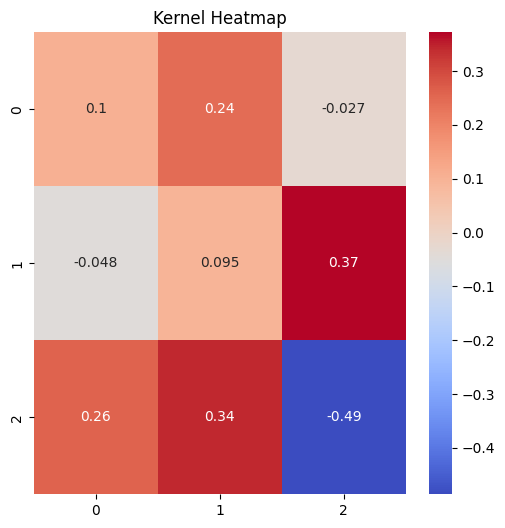

Using kernel shape for convolution: (3, 3, 1, 1)
Images saved to ./convolved_images_random2


In [15]:
file_path = "../../generateModelWeights_week4/InitWeightsConv2/layer_number_0.npz"
output_dir = "./convolved_images_random2"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

loaded = np.load(file_path)
kernel = loaded['arr_0']
print(f"Kernel shape: {kernel.shape}")

kernel_to_plot = kernel[:, :, 0, 0]  
plt.figure(figsize=(6, 6))
sns.heatmap(kernel_to_plot, annot=True, cmap='coolwarm', cbar=True)
plt.title("Kernel Heatmap")
plt.show()

digit_images_normalized = {digit: img.astype('float32') / 255.0 for digit, img in digit_images.items()}
save_convolved_images(kernel, digit_images_normalized)
print(f"Images saved to {output_dir}")

Kernel shape: (3, 3, 1, 1)


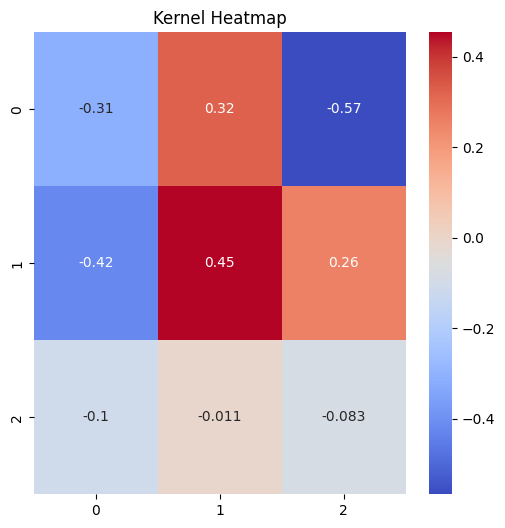

Using kernel shape for convolution: (3, 3, 1, 1)
Images saved to ./convolved_images_random3


In [16]:
file_path = "../../generateModelWeights_week4/InitWeightsConv3/layer_number_0.npz"
output_dir = "./convolved_images_random3"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

loaded = np.load(file_path)
kernel = loaded['arr_0']
print(f"Kernel shape: {kernel.shape}")

kernel_to_plot = kernel[:, :, 0, 0]  
plt.figure(figsize=(6, 6))
sns.heatmap(kernel_to_plot, annot=True, cmap='coolwarm', cbar=True)
plt.title("Kernel Heatmap")
plt.show()

digit_images_normalized = {digit: img.astype('float32') / 255.0 for digit, img in digit_images.items()}
save_convolved_images(kernel, digit_images_normalized)
print(f"Images saved to {output_dir}")

Kernel shape: (3, 3, 1, 1)


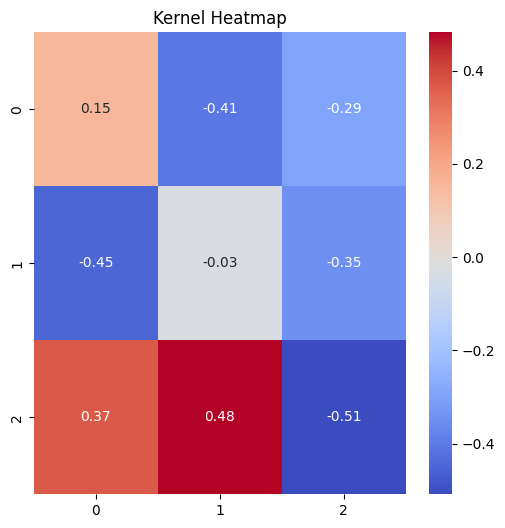

Using kernel shape for convolution: (3, 3, 1, 1)
Images saved to ./convolved_images_random4


In [17]:
file_path = "../../generateModelWeights_week4/InitWeightsConv4/layer_number_0.npz"
output_dir = "./convolved_images_random4"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

loaded = np.load(file_path)
kernel = loaded['arr_0']
print(f"Kernel shape: {kernel.shape}")

kernel_to_plot = kernel[:, :, 0, 0]  
plt.figure(figsize=(6, 6))
sns.heatmap(kernel_to_plot, annot=True, cmap='coolwarm', cbar=True)
plt.title("Kernel Heatmap")
plt.show()

digit_images_normalized = {digit: img.astype('float32') / 255.0 for digit, img in digit_images.items()}
save_convolved_images(kernel, digit_images_normalized)
print(f"Images saved to {output_dir}")

Kernel shape: (3, 3, 1, 1)


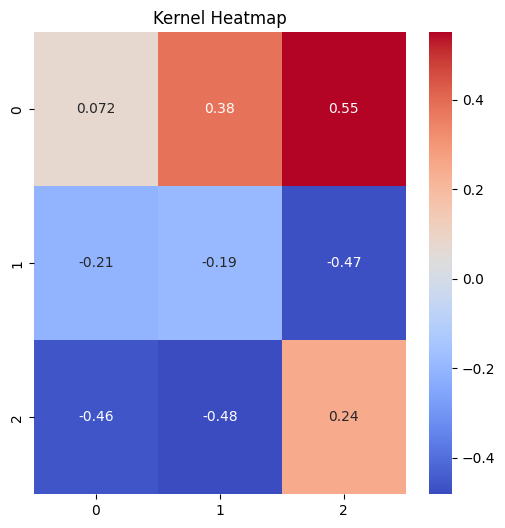

Using kernel shape for convolution: (3, 3, 1, 1)
Images saved to ./convolved_images_random5


In [18]:
file_path = "../../generateModelWeights_week4/InitWeightsConv5/layer_number_0.npz"
output_dir = "./convolved_images_random5"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

loaded = np.load(file_path)
kernel = loaded['arr_0']
print(f"Kernel shape: {kernel.shape}")

kernel_to_plot = kernel[:, :, 0, 0]  
plt.figure(figsize=(6, 6))
sns.heatmap(kernel_to_plot, annot=True, cmap='coolwarm', cbar=True)
plt.title("Kernel Heatmap")
plt.show()

digit_images_normalized = {digit: img.astype('float32') / 255.0 for digit, img in digit_images.items()}
save_convolved_images(kernel, digit_images_normalized)
print(f"Images saved to {output_dir}")